"Cell-Cycle Scoring with Seurat and ggplot2"

    "Using umap information to generate customize dimension plots"

    toc: false
    branch: master
    badges: true
    comments: false
    categories: [R, jupyter, singlecell, Seurat, ggplot]
    image: images/cellcycle.png
    hide: false

This note uses R kernel.

First load the data matrix, the files used here is available from [here](https://www.dropbox.com/s/3dby3bjsaf5arrw/cell_cycle_vignette_files.zip?dl=1).

In [1]:
library(Seurat)

# Read in the expression matrix The first row is a header row, the first column is rownames
exp.mat <- read.table(file = "./nestorawa_forcellcycle_expressionMatrix.txt", header = TRUE,
    as.is = TRUE, row.names = 1)

# A list of cell cycle markers, from Tirosh et al, 2015, is loaded with Seurat.  We can
# segregate this list into markers of G2/M phase and markers of S phase
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes

# Create our Seurat object and complete the initalization steps
marrow <- CreateSeuratObject(counts = exp.mat)
marrow <- NormalizeData(marrow)
marrow <- FindVariableFeatures(marrow, selection.method = "vst")
marrow <- ScaleData(marrow, features = rownames(marrow))

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject

Centering and scaling data matrix



If we run a PCA on our object, using the variable genes we found in FindVariableFeatures() above, we see that while most of the variance can be explained by lineage, PC8 and PC10 are split on cell-cycle genes including TOP2A and MKI67. We will attempt to regress this signal from the data, so that cell-cycle heterogeneity does not contribute to PCA or downstream analysis.

In [2]:
marrow <- RunPCA(marrow, features = VariableFeatures(marrow), ndims.print = 6:10, nfeatures.print = 10)

PC_ 6 
Positive:  SELL, ARL6IP1, CCL9, CD34, ADGRL4, BPIFC, NUSAP1, FAM64A, CD244, C030034L19RIK 
Negative:  LY6C2, AA467197, CYBB, MGST2, ITGB2, PF4, CD74, ATP1B1, GP1BB, TREM3 
PC_ 7 
Positive:  F13A1, LY86, CFP, IRF8, CSF1R, TIFAB, IFI209, CCR2, TNS4, MS4A6C 
Negative:  HDC, CPA3, PGLYRP1, MS4A3, NKG7, UBE2C, CCNB1, NUSAP1, PLK1, FUT8 
PC_ 8 
Positive:  NUSAP1, UBE2C, KIF23, PLK1, CENPF, FAM64A, CCNB1, H2AFX, ID2, CDC20 
Negative:  WFDC17, SLC35D3, ADGRL4, VLDLR, CD33, H2AFY, P2RY14, IFI206, CCL9, CD34 
PC_ 9 
Positive:  IGKC, JCHAIN, LY6D, MZB1, CD74, IGLC2, FCRLA, IGKV4-50, IGHM, IGHV9-1 
Negative:  SLC2A6, HBA-A1, HBA-A2, IGHV8-7, FCER1G, F13A1, HBB-BS, PLD4, HBB-BT, IGFBP4 
PC_ 10 
Positive:  H2AFX, FAM64A, ZFP383, NUSAP1, CDC25B, CENPF, GBP10, TOP2A, GBP6, GFRA1 
Negative:  CTSW, XKRX, PRR5L, RORA, MBOAT4, A630014C17RIK, ZFP105, COL9A3, CLEC2I, TRAT1 



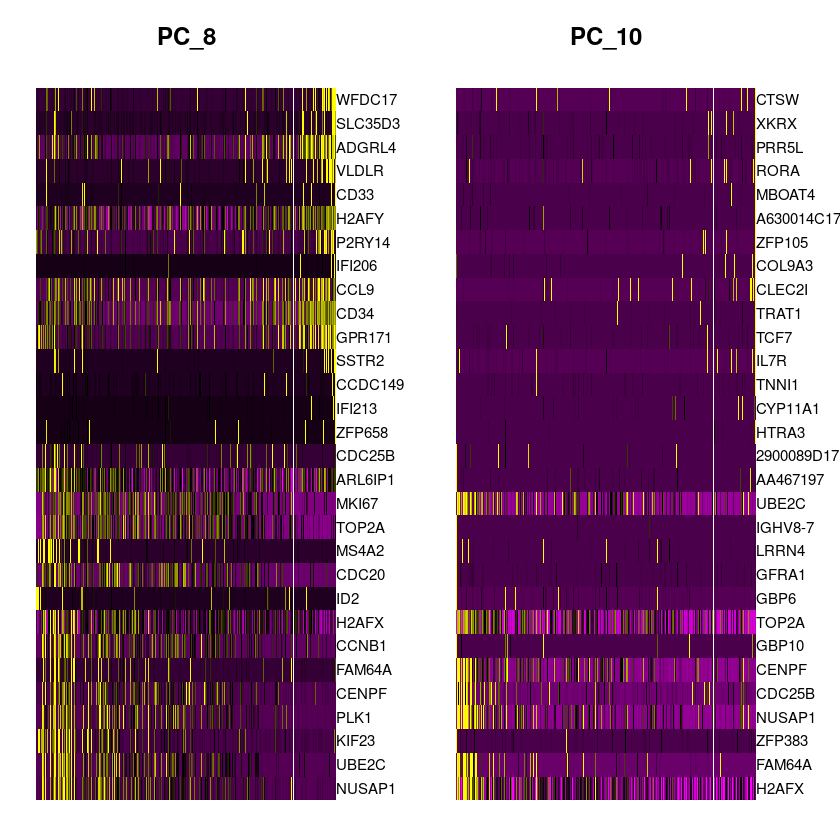

In [3]:
DimHeatmap(marrow, dims = c(8, 10))

## Assign Cell-Cycle Scores

In the CellCycleScoring() function, which stores S and G2/M scores in object meta data, along with the predicted classification of each cell in either G2M, S or G1 phase. 


In [4]:
marrow <- CellCycleScoring(marrow, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)

# view cell cycle scores and phase assignments
head(marrow[[]])

Warning message:
“The following features are not present in the object: MLF1IP, GMNN, not searching for symbol synonyms”


,orig.ident,nCount_RNA,nFeature_RNA,S.Score,G2M.Score,Phase,old.ident
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<fct>
Prog_013,Prog,2563089,10211,-0.14248691,-0.4680395,G1,Prog
Prog_019,Prog,3030620,9991,-0.16915786,0.5851766,G2M,Prog
Prog_031,Prog,1293487,10192,-0.34627038,-0.3971879,G1,Prog
Prog_037,Prog,1357987,9599,-0.44270212,0.6820229,G2M,Prog
Prog_008,Prog,4079891,10540,0.55854051,0.1284359,S,Prog
Prog_014,Prog,2569783,10788,0.07116218,0.3166073,G2M,Prog


Picking joint bandwidth of 0.144

Picking joint bandwidth of 0.143

Picking joint bandwidth of 0.177

Picking joint bandwidth of 0.129



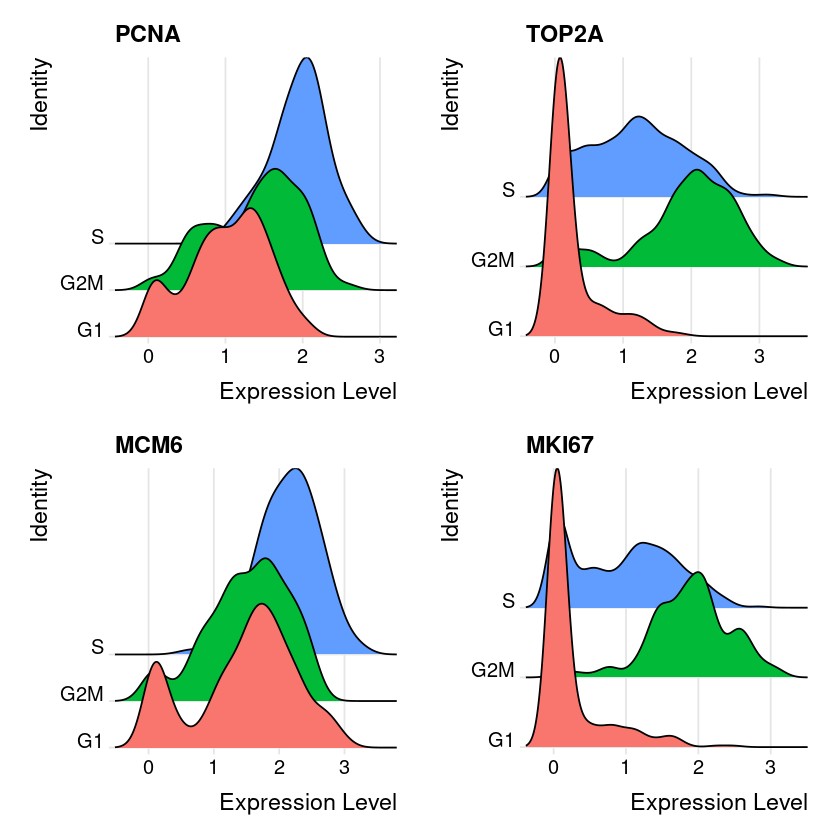

In [5]:
# Visualize the distribution of cell cycle markers across
RidgePlot(marrow, features = c("PCNA", "TOP2A", "MCM6", "MKI67"), ncol = 2)

In [6]:
s.genes

[1] "MCM5"     "PCNA"     "TYMS"     "FEN1"     "MCM2"     "MCM4"    
 [7] "RRM1"     "UNG"      "GINS2"    "MCM6"     "CDCA7"    "DTL"     
[13] "PRIM1"    "UHRF1"    "MLF1IP"   "HELLS"    "RFC2"     "RPA2"    
[19] "NASP"     "RAD51AP1" "GMNN"     "WDR76"    "SLBP"     "CCNE2"   
[25] "UBR7"     "POLD3"    "MSH2"     "ATAD2"    "RAD51"    "RRM2"    
[31] "CDC45"    "CDC6"     "EXO1"     "TIPIN"    "DSCC1"    "BLM"     
[37] "CASP8AP2" "USP1"     "CLSPN"    "POLA1"    "CHAF1B"   "BRIP1"   
[43] "E2F8"

In [7]:
g2m.genes

[1] "HMGB2"   "CDK1"    "NUSAP1"  "UBE2C"   "BIRC5"   "TPX2"    "TOP2A"  
 [8] "NDC80"   "CKS2"    "NUF2"    "CKS1B"   "MKI67"   "TMPO"    "CENPF"  
[15] "TACC3"   "FAM64A"  "SMC4"    "CCNB2"   "CKAP2L"  "CKAP2"   "AURKB"  
[22] "BUB1"    "KIF11"   "ANP32E"  "TUBB4B"  "GTSE1"   "KIF20B"  "HJURP"  
[29] "CDCA3"   "HN1"     "CDC20"   "TTK"     "CDC25C"  "KIF2C"   "RANGAP1"
[36] "NCAPD2"  "DLGAP5"  "CDCA2"   "CDCA8"   "ECT2"    "KIF23"   "HMMR"   
[43] "AURKA"   "PSRC1"   "ANLN"    "LBR"     "CKAP5"   "CENPE"   "CTCF"   
[50] "NEK2"    "G2E3"    "GAS2L3"  "CBX5"    "CENPA"

For more information about how to regress this source of heterogeneity(cell cycles) out of the data, you can check [here](https://satijalab.org/seurat/articles/cell_cycle_vignette.html).

## Check clusters and identify cells
Number of clusters could be adjust based on the background information.

In [8]:
marrow <- FindNeighbors(marrow, dims = 1:10)
marrow <- FindClusters(marrow, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 774
Number of edges: 21265

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8447
Number of communities: 6
Elapsed time: 0 seconds


In [9]:
# Look at cluster IDs of the first 5 cells
head(Idents(marrow), 5)

Prog_013 Prog_019 Prog_031 Prog_037 Prog_008 
       0        0        3        5        1 
Levels: 0 1 2 3 4 5

Run umap and visualize:

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


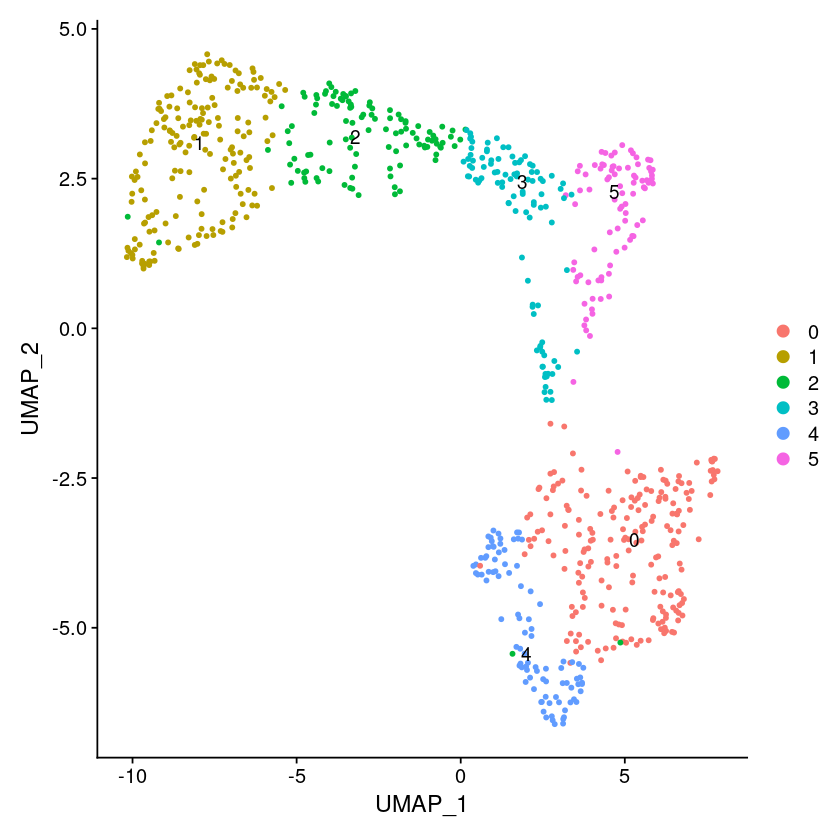

In [10]:
marrow <- RunUMAP(marrow, dims = 1:10, verbose = FALSE)
DimPlot(marrow, reduction = "umap", label = TRUE)

## Annotation with SingleR

In [11]:
library(celldex, verbose = FALSE)
hpca.se <- HumanPrimaryCellAtlasData()

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

In [12]:
hpca.se

class: SummarizedExperiment 
dim: 19363 713 
metadata(0):
assays(1): logcounts
rownames(19363): A1BG A1BG-AS1 ... ZZEF1 ZZZ3
rowData names(0):
colnames(713): GSM112490 GSM112491 ... GSM92233 GSM92234
colData names(3): label.main label.fine label.ont

In [16]:
pred.hesc <- SingleR::SingleR(GetAssayData(marrow, assay = "RNA", slot = "data"), clusters = Idents(marrow),ref = hpca.se, assay.type.test=1,
    labels = hpca.se$label.main)

In [17]:
pred.hesc

DataFrame with 6 rows and 5 columns
                          scores first.labels     tuning.scores        labels
                        <matrix>  <character>       <DataFrame>   <character>
0 0.377020:0.586039:0.612565:...          GMP 0.358065:0.267735           GMP
1 0.420151:0.546801:0.551765:...          MEP 0.412205:0.353706  Erythroblast
2 0.401024:0.572664:0.578866:...          MEP 0.273437:0.226113           MEP
3 0.378935:0.548739:0.578182:...          CMP 0.224248:0.218487           CMP
4 0.375977:0.579766:0.627907:...          GMP 0.246549:0.214529 Pro-Myelocyte
5 0.392911:0.556911:0.582148:...          MEP 0.251734:0.186742           MEP
  pruned.labels
    <character>
0           GMP
1  Erythroblast
2           MEP
3           CMP
4 Pro-Myelocyte
5           MEP

In [18]:
# Summarizing the distribution:
table(pred.hesc$labels)


          CMP  Erythroblast           GMP           MEP Pro-Myelocyte 
            1             1             1             2             1 

Import cluster ident information back to seurat object.

In [19]:
marrow[["SingleR.cluster.labels"]] <- 
        pred.hesc$labels[match(Idents(marrow), rownames(pred.hesc))]

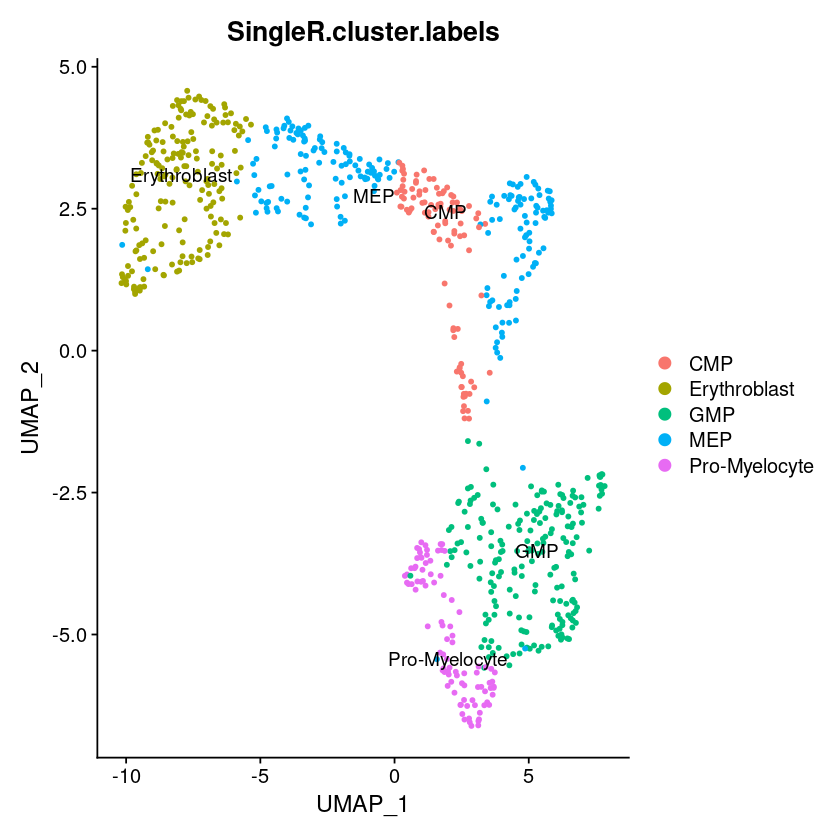

In [20]:
DimPlot(marrow, reduction = "umap", label = TRUE,group.by = "SingleR.cluster.labels")

Or identify cells individually:

In [21]:
pred.hesc2 <- SingleR::SingleR(GetAssayData(marrow, assay = "RNA", slot = "data"),ref = hpca.se, assay.type.test=1,
    labels = hpca.se$label.main)
table(pred.hesc2$labels)


          B_cell       BM & Prog.              CMP     Erythroblast 
               1               13              168              177 
             GMP       HSC_-G-CSF              MEP Pro-B_cell_CD34+ 
             184                1              169               14 
   Pro-Myelocyte 
              47 

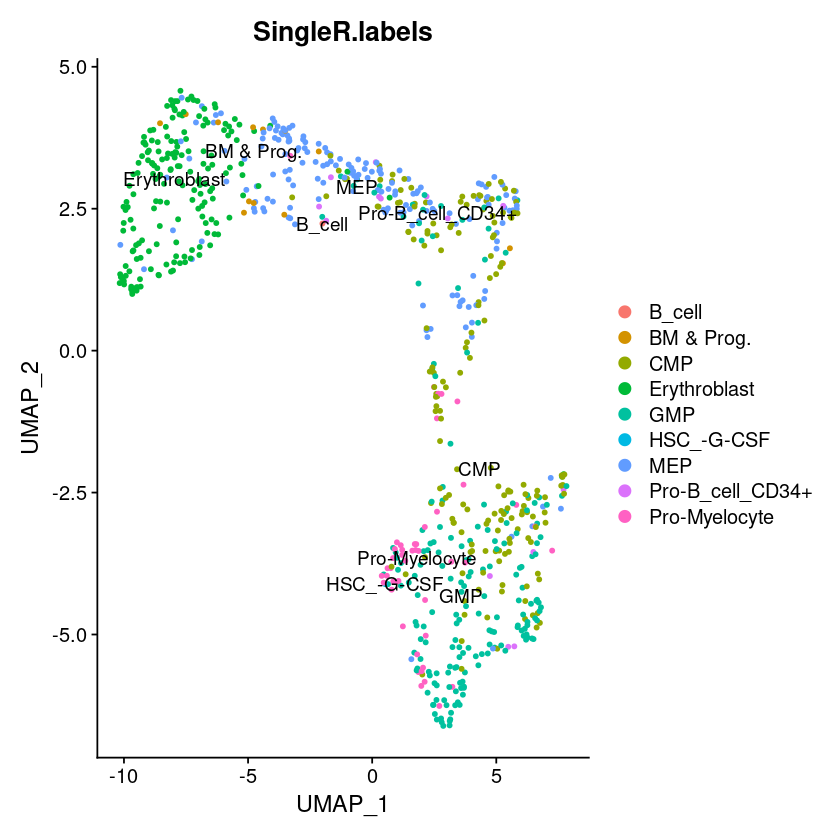

In [23]:
colors = c("#097559","#757575","#C29359","#C2101E","#EDDB51","#EDDCBE","#F7A3AA","#1BBCC2","#F6E246")
marrow[["SingleR.labels"]] <- pred.hesc2$labels
DimPlot(marrow, reduction = "umap", label = TRUE,group.by = "SingleR.labels")

## Re-plot with ggplot2
Here to demostrate both the cell cyclcing information and cell definistion from SingleR, shapes and color are used to represent different layers of data.

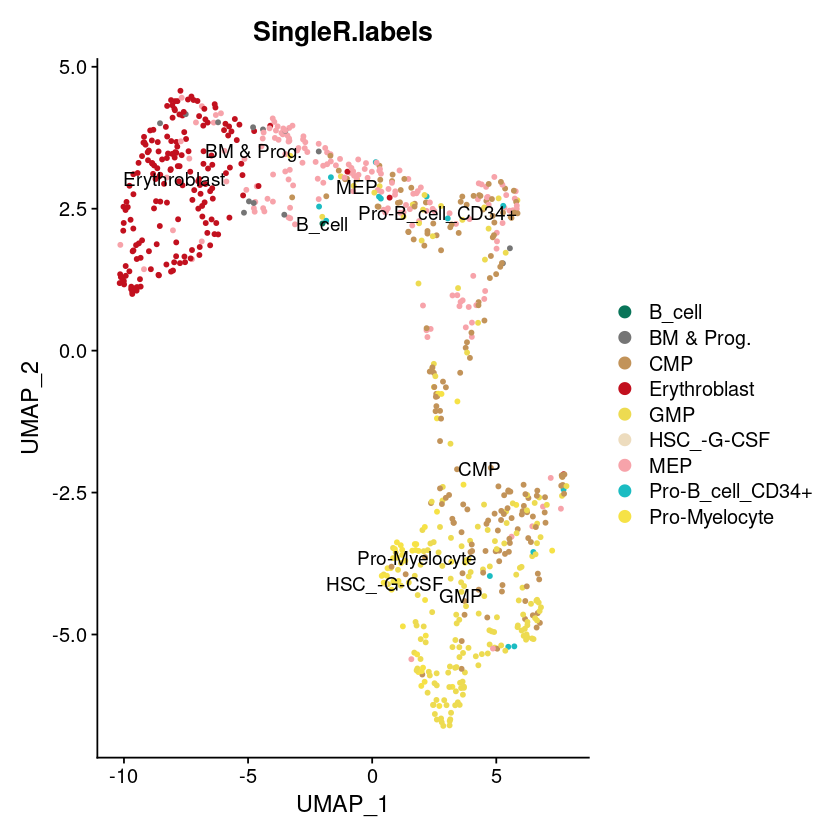

In [24]:
colors = c("#097559","#757575","#C29359","#C2101E","#EDDB51","#EDDCBE","#F7A3AA","#1BBCC2","#F6E246")
DimPlot(marrow, reduction = "umap", label = TRUE, group.by = "SingleR.labels", cols = colors)

Export to use ggplot2 directly:

In [25]:
library(tidyverse, verbose = FALSE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse()   masks IRanges::collapse()
✖ dplyr::combine()    masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()      masks matrixStats::count()
✖ dplyr::desc()       masks IRanges::desc()
✖ tidyr::expand()     masks S4Vectors::expand()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::first()      masks S4Vectors::first()
✖ dplyr::lag()        masks stats::lag()
✖ ggplot2::Position() masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()     masks GenomicRanges::reduce(), IRanges::reduce()
✖ dplyr::rename()     masks S4Vectors::rename()
✖ dplyr::slice()      masks IRanges::slice()



In [26]:
umap_tx = marrow@reductions$umap@cell.embeddings %>% 
    as.data.frame() %>% 
    cbind(cycle = marrow@meta.data$Phase) %>%
    cbind(singleRid = marrow@meta.data$SingleR.labels)

In [35]:
options(repr.plot.width=12, repr.plot.height=8)

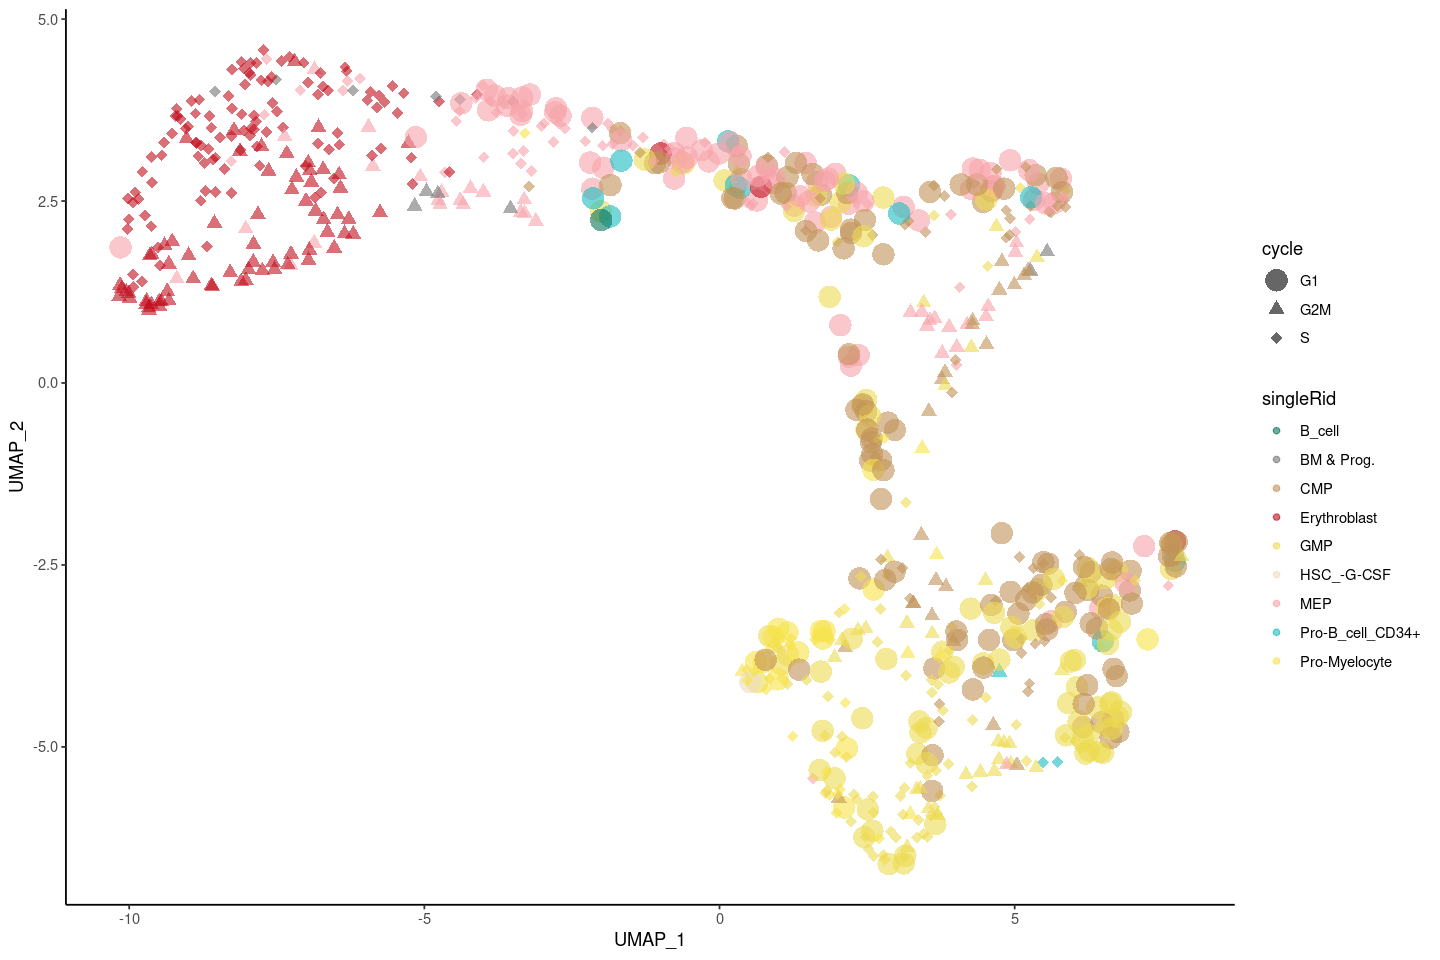

In [41]:
ggplot(umap_tx, aes(x=UMAP_1, y=UMAP_2, color=singleRid, shape=cycle)) + 
    geom_point(aes(size=cycle), alpha = 0.6 ) +
    scale_color_manual(values = colors) +
    scale_size_manual(values = c(6,3,3)) +
    scale_shape_manual(values = c(16,17,18)) +
    theme_bw() +
    theme(panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"))

We can tall from the plot that cell cycling phases could contribute to the ambiguity of annotation and clustering.<br>

## Session information

In [42]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux 11 (bullseye)

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] forcats_0.5.1               stringr_1.4.0              
 [3] dplyr_1.0.8                 purrr_0.3.4                
 [5] readr_2.1.2                 tidyr_1.2.0                
 [7] tibble_3.1.6                ggplot2_3.3.5             

Created: 02/09/2022 by vikkki